In [144]:
#Load in the dataset
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pylab as plt
df = pd.read_csv('cirrhosis.csv')
df.tail()



,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
413,414,681,D,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,C,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0
417,418,976,C,NaN,19358,F,NaN,NaN,NaN,N,0.7,NaN,3.29,NaN,NaN,NaN,NaN,350.0,10.6,4.0


In [145]:
#Datatypes
print(df.dtypes)


ID                 int64
N_Days             int64
Status            object
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
dtype: object


In [146]:
#Percent M/F
females = len(df[df['Sex'] == 'F'])
males = len(df[df['Sex'] == 'M'])
total = len(df)
print(males/total) #11% males
print(females/total) #89% females

0.10526315789473684
0.8947368421052632


In [147]:
#missing values -- Drug, Ascites, Hepatomology, Spiders, Cholesterol, Copper, Alk_Phos, SGOT, Tryglicerides, Platelets, Prothrombin, Stage
for col in df.columns:
    missing_values = df[col].isnull().sum()
    if missing_values > 0:
        print(col, (missing_values/len(df[col])), 'missing values')

print('12 out of', len(df.columns), 'columns have missing values')

Drug 0.2535885167464115 missing values
Ascites 0.2535885167464115 missing values
Hepatomegaly 0.2535885167464115 missing values
Spiders 0.2535885167464115 missing values
Cholesterol 0.32057416267942584 missing values
Copper 0.2583732057416268 missing values
Alk_Phos 0.2535885167464115 missing values
SGOT 0.2535885167464115 missing values
Tryglicerides 0.3253588516746411 missing values
Platelets 0.02631578947368421 missing values
Prothrombin 0.004784688995215311 missing values
Stage 0.014354066985645933 missing values
12 out of 20 columns have missing values


In [148]:
#Exploring the target variable
print(df['Status'].value_counts())

Status
C     232
D     161
CL     25
Name: count, dtype: int64


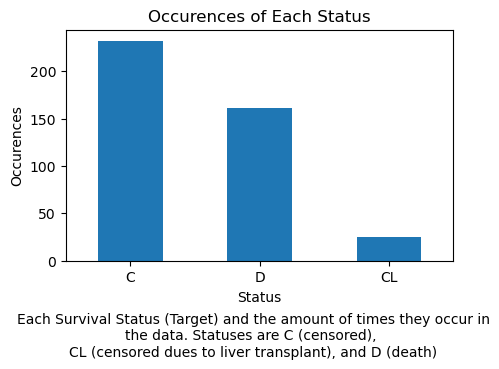

In [149]:
#Status (Target) -- categorical
plt.figure(figsize=(5,3))
pd.value_counts(df['Status']).plot.bar()
plt.title('Occurences of Each Status')
plt.ylabel('Occurences')
plt.xlabel('Status')
txt='''Each Survival Status (Target) and the amount of times they occur in the data. Statuses are C (censored), 
CL (censored dues to liver transplant), and D (death)'''
plt.figtext(0.5, -0.2, txt, wrap=True, horizontalalignment='center', fontsize=10)
plt.xticks(rotation=360)
plt.show()

In [150]:
#Stage -- Ordinal
pd.value_counts(df['Stage'])

Stage
3.0    155
4.0    144
2.0     92
1.0     21
Name: count, dtype: int64

In [151]:
df_correct_order = df
correct_order = [1, 2, 3, 4]

pd.value_counts(df_correct_order['Stage']).reindex(correct_order)

Stage
1     21
2     92
3    155
4    144
Name: count, dtype: int64

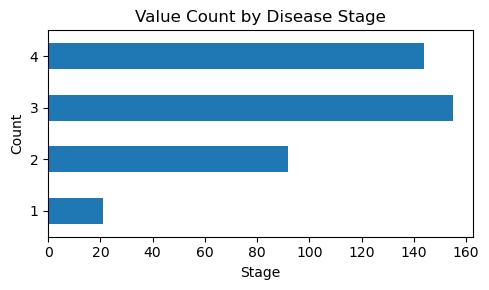

In [152]:
plt.figure(figsize=(5,3))

pd.value_counts(df_correct_order['Stage']).reindex(correct_order).plot.barh()
plt.ylabel('Count')
plt.xlabel('Stage')
plt.title('Value Count by Disease Stage')
plt.tight_layout()
plt.show()

In [153]:
#Platelets -- Continuous
print(df['Platelets'].describe())

count    407.000000
mean     257.024570
std       98.325585
min       62.000000
25%      188.500000
50%      251.000000
75%      318.000000
max      721.000000
Name: Platelets, dtype: float64


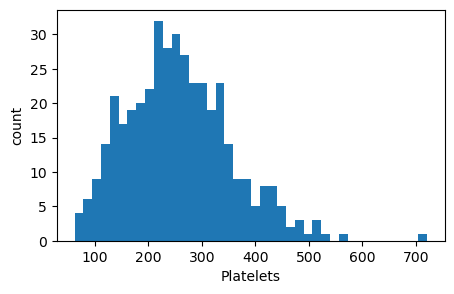

In [154]:
plt.figure(figsize=(5,3))

df['Platelets'].plot.hist(bins = int(2 * np.sqrt(df.shape[0])))
plt.xlabel('Platelets')
plt.ylabel('count')
plt.show()

In [155]:
#Continuous vs. Categorical -- stacked bar plot
count_matrix = df.groupby(['Ascites', 'Status']).size().unstack()
print(count_matrix)

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm) #important -- no instance of CL and Y


Status       C    CL      D
Ascites                    
N        167.0  19.0  102.0
Y          1.0   NaN   23.0
Status          C        CL         D
Ascites                              
N        0.579861  0.065972  0.354167
Y        0.041667       NaN  0.958333


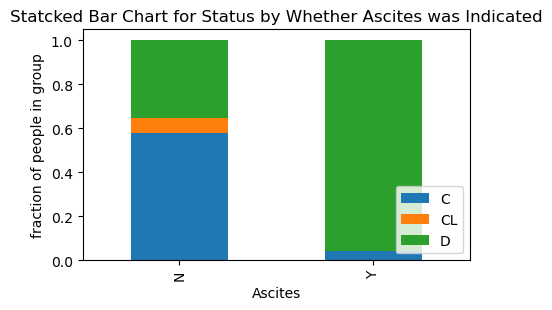

In [156]:
count_matrix_norm.plot(kind='bar', stacked=True,figsize=(5,3))
plt.title('Statcked Bar Chart for Status by Whether Ascites was Indicated')
plt.ylabel('fraction of people in group')
plt.legend(loc=4)
plt.show()

In [157]:
count_matrix = df.groupby(['Hepatomegaly', 'Status']).size().unstack()

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm) 

Status               C        CL         D
Hepatomegaly                              
N             0.710526  0.046053  0.243421
Y             0.375000  0.075000  0.550000


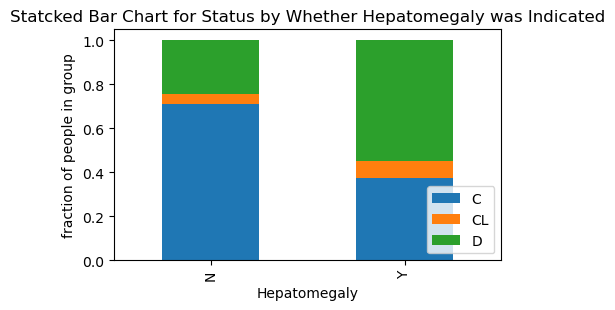

In [158]:
count_matrix_norm.plot(kind='bar', stacked=True,figsize=(5,3))
plt.title('Statcked Bar Chart for Status by Whether Hepatomegaly was Indicated')
plt.ylabel('fraction of people in group')
plt.legend(loc=4)
plt.show()

In [159]:
count_matrix = df.groupby(['Spiders', 'Status']).size().unstack()

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm) 

Status          C        CL         D
Spiders                              
N        0.608108  0.063063  0.328829
Y        0.366667  0.055556  0.577778


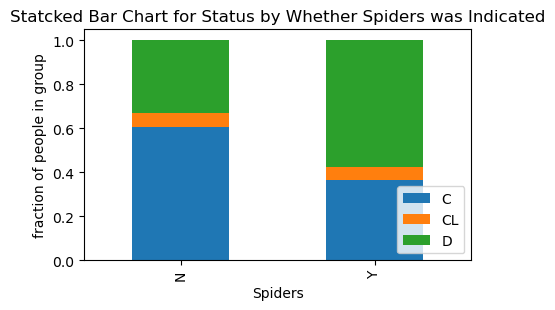

In [160]:
count_matrix_norm.plot(kind='bar', stacked=True,figsize=(5,3))
plt.title('Statcked Bar Chart for Status by Whether Spiders was Indicated')
plt.ylabel('fraction of people in group')
plt.legend(loc=4)
plt.show()

In [161]:
count_matrix = df.groupby(['Edema', 'Status']).size().unstack()

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm) #important that there are no instances of CL and Y

Status         C        CL         D
Edema                               
N       0.610169  0.062147  0.327684
S       0.340909  0.068182  0.590909
Y       0.050000       NaN  0.950000


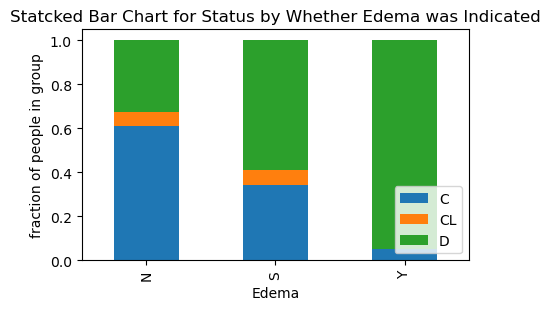

In [162]:
count_matrix_norm.plot(kind='bar', stacked=True,figsize=(5,3))
plt.ylabel('fraction of people in group')
plt.title('Statcked Bar Chart for Status by Whether Edema was Indicated')
plt.legend(loc=4)
plt.show()

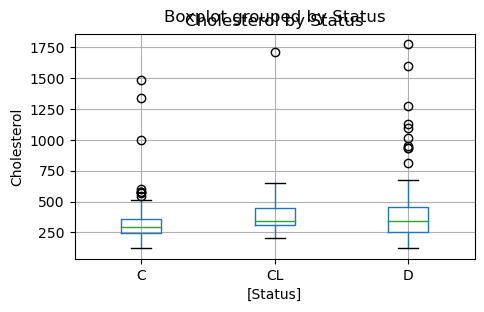

In [163]:
#Continuous vs. Categorical -- hist, box plot, violin
#avoided a category-specific histogram because the target variable has 3 categories
#Billrubin
df[['Cholesterol','Status']].boxplot(by='Status',figsize=(5,3))
plt.ylabel('Cholesterol')
plt.title('Cholesterol by Status')
plt.show() #fix overlap

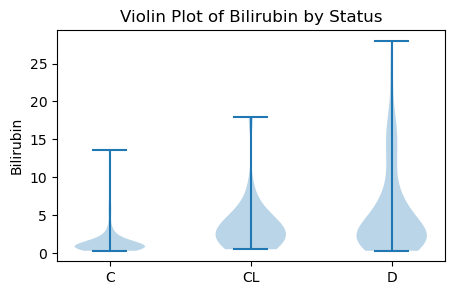

In [164]:
#Violin Plot for Bilirubin
dataset = [df[df['Status']=='C']['Bilirubin'].values,
           df[df['Status']=='CL']['Bilirubin'].values, 
           df[df['Status']=='D']['Bilirubin'].values]

plt.figure(figsize=(5,3))

plt.violinplot(dataset = dataset)
plt.xticks([1,2,3],['C','CL', 'D'])
plt.ylabel('Bilirubin')
plt.title('Violin Plot of Bilirubin by Status')
plt.show()

To add with EDA -- fix titles and choose best, continuous versus continuous scatterplot without the target variable, more violin/scatterplots for the rest of the continuous variables, more print outs like descriptions of variables

In [165]:
#Splitting -- since the data is iid, we can use regular 60,20,20 split, but only 25 CL, so we need to use Stratified Kfolds
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
df = df.drop(['ID'], axis=1) #ID is superfluous
df = df.drop(['Drug'], axis=1)
# df = df.replace('NA', np.nan)

# Define the mapping of values to be replaced
replacement_map = {'C': 0, 'CL': 1, 'D': 2}

# Use the replace method to replace values in the specified column
df['Status'] = df['Status'].replace(replacement_map)

random_state = 42

y = df['Status']

X = df.loc[:, df.columns != 'Status'] 


X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,stratify=y,random_state=random_state)
print('test balance:',np.unique(y_test,return_counts=True))


kf = StratifiedKFold(n_splits=4,shuffle=True,random_state=random_state)
for train_index, val_index in kf.split(X_other,y_other):
    print('new fold')
    X_train = X_other.iloc[train_index]
    y_train = y_other.iloc[train_index]
    X_val = X_other.iloc[val_index]
    y_val = y_other.iloc[val_index]
    print(np.unique(y_train,return_counts=True))
    print(np.unique(y_val,return_counts=True))


test balance: (array([0, 1, 2]), array([47,  5, 32]))
new fold
(array([0, 1, 2]), array([138,  15,  97]))
(array([0, 1, 2]), array([47,  5, 32]))
new fold
(array([0, 1, 2]), array([139,  15,  96]))
(array([0, 1, 2]), array([46,  5, 33]))
new fold
(array([0, 1, 2]), array([139,  15,  97]))
(array([0, 1, 2]), array([46,  5, 32]))
new fold
(array([0, 1, 2]), array([139,  15,  97]))
(array([0, 1, 2]), array([46,  5, 32]))


In [166]:
#Check that the lengths of the groups are correct
print(len(X_train))
print(len(X_test))
print(len(X_val))

251
84
83


Make sure to fit_transform the training set, transform the validation and test sets! Check that I did this correctly. And handle missing values in the ordinal and categorical, describe missing values in continuous. Do I encode ID? How about treatment, which I know is extra?

In [167]:
X_train['Stage'].unique()

array([ 3.,  2.,  4., nan,  1.])

In [168]:
df.tail()

,N_Days,Status,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
413,681,2,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,1103,0,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,1055,0,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,691,0,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0
417,976,0,19358,F,NaN,NaN,NaN,N,0.7,NaN,3.29,NaN,NaN,NaN,NaN,350.0,10.6,4.0


Are discrete values still std_ftrs? Assume they are numerical rather than ordinal

In [169]:
df['Stage'].unique()

array([ 4.,  3.,  2.,  1., nan])

In [170]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
#Now need to process the categorical, ordinal, and numerical variables
ordinal_ftrs = ['Stage'] 
ordinal_cats = [[ 1.,  2.,  3., 4.]]
onehot_ftrs = ['Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
std_ftrs = ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']

# one-hot encoder -- categorical
# Make the missing values categories
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',fill_value='missing')),
    ('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'))])

# ordinal encoder
#Make the missing values categories
ordinal_transformer = Pipeline(steps=[
    ('imputer2', SimpleImputer(missing_values=np.nan, strategy='constant')),
    ('ordinal', OrdinalEncoder(categories= ordinal_cats, handle_unknown='use_encoded_value', unknown_value=np.nan))

    # ('ordinal', OrdinalEncoder(categories = ordinal_cats, handle_unknown='error'))
    ])

# standard scaler
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, std_ftrs),
        ('cat', categorical_transformer, onehot_ftrs),
        ('ord', ordinal_transformer, ordinal_ftrs)])

clf = Pipeline(steps=[('preprocessor', preprocessor)]) 

X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)

# print(X_train.shape)
# print(X_train_prep.shape)
# print(X_train_prep)

# collect feature names
feature_names = preprocessor.get_feature_names_out()

df_train = pd.DataFrame(data=X_train_prep,columns=feature_names)
print(df_train.shape)

# transform the CV
df_CV = pd.DataFrame(data=X_val_prep,columns = feature_names)
print(df_CV.shape)

# transform the test
df_test = pd.DataFrame(data=X_test_prep,columns = feature_names)
print(df_test.shape)


#Label the features as categorical, ordinal, or continuous

#Preprocess

#Handle missing values in categorical and ordinal


(251, 26)
(83, 26)
(84, 26)


Questions:
- Do we need a val set
- Why is there an ordinal feature still?

In [172]:
print('data dimensions:',df_train.shape)
perc_missing_per_ftr = df_train.isnull().sum(axis=0)/df_train.shape[0]
print('fraction of missing values in features:')
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])
frac_missing = sum(df_train.isnull().sum(axis=1)!=0)/df_train.shape[0]
print('fraction of points with missing values:',frac_missing)

data dimensions: (251, 26)
fraction of missing values in features:
num__Cholesterol      0.290837
num__Copper           0.231076
num__Alk_Phos         0.223108
num__SGOT             0.223108
num__Tryglicerides    0.294821
num__Platelets        0.027888
ord__Stage            0.011952
dtype: float64
fraction of points with missing values: 0.30677290836653387


In [173]:
mask = df_test[['num__Cholesterol','num__Copper','num__Alk_Phos', 'num__SGOT', 'num__Tryglicerides', 'num__Platelets']].isnull()

unique_rows, counts = np.unique(mask, axis=0,return_counts=True)
print(unique_rows.shape) # 6 patterns, we will train 6 models
for i in range(len(counts)):
    print(unique_rows[i],counts[i])

#Only 6 groupings so can def use this!

(6, 6)
[False False False False False False] 47
[False False False False False  True] 1
[False False False False  True False] 1
[ True False False False  True False] 5
[ True  True  True  True  True False] 29
[ True  True  True  True  True  True] 1


In [174]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
# Specify the column and drop rows with NaN in that column
X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,stratify=y,random_state=random_state)
print('test balance:',np.unique(y_test,return_counts=True))


kf = StratifiedKFold(n_splits=4,shuffle=True,random_state=random_state)
for train_index, val_index in kf.split(X_other,y_other):
    print('new fold')
    X_train = X_other.iloc[train_index]
    y_train = y_other.iloc[train_index]
    X_val = X_other.iloc[val_index]
    y_val = y_other.iloc[val_index]
    print(np.unique(y_train,return_counts=True))
    print(np.unique(y_val,return_counts=True))


#Now need to process the categorical, ordinal, and numerical variables
ordinal_ftrs = ['Stage'] 
ordinal_cats = [[ 1.,  2.,  3., 4.]]
onehot_ftrs = ['Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
std_ftrs = ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']

# one-hot encoder -- categorical
# Make the missing values categories
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',fill_value='missing')),
    ('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'))])

# ordinal encoder
#Make the missing values categories
ordinal_transformer = Pipeline(steps=[
    ('imputer2', SimpleImputer(missing_values=np.nan, strategy='constant')),
    ('ordinal', OrdinalEncoder(categories= ordinal_cats, handle_unknown='use_encoded_value', unknown_value=np.nan))

    # ('ordinal', OrdinalEncoder(categories = ordinal_cats, handle_unknown='error'))
    ])

# standard scaler
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()), 
    ('imperative', IterativeImputer(estimator = RandomForestRegressor(n_estimators=1, random_state=42), random_state=42))])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, std_ftrs),
        ('cat', categorical_transformer, onehot_ftrs),
        ('ord', ordinal_transformer, ordinal_ftrs)])

clf = Pipeline(steps=[('preprocessor', preprocessor)]) 

X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)

# print(X_train.shape)
# print(X_train_prep.shape)
# print(X_train_prep)

# collect feature names
feature_names = preprocessor.get_feature_names_out()

df_train = pd.DataFrame(data=X_train_prep,columns=feature_names)
print(df_train.shape)

# transform the CV
df_CV = pd.DataFrame(data=X_val_prep,columns = feature_names)
print(df_CV.shape)

# transform the test
df_test = pd.DataFrame(data=X_test_prep,columns = feature_names)
print(df_test.shape)



test balance: (array([0, 1, 2]), array([47,  5, 32]))
new fold
(array([0, 1, 2]), array([138,  15,  97]))
(array([0, 1, 2]), array([47,  5, 32]))
new fold
(array([0, 1, 2]), array([139,  15,  96]))
(array([0, 1, 2]), array([46,  5, 33]))
new fold
(array([0, 1, 2]), array([139,  15,  97]))
(array([0, 1, 2]), array([46,  5, 32]))
new fold
(array([0, 1, 2]), array([139,  15,  97]))
(array([0, 1, 2]), array([46,  5, 32]))
(251, 26)
(83, 26)
(84, 26)


In [175]:
print('data dimensions:',df_train.shape)
perc_missing_per_ftr = df_train.isnull().sum(axis=0)/df_train.shape[0]
print('fraction of missing values in features:')
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])
frac_missing = sum(df_train.isnull().sum(axis=1)!=0)/df_train.shape[0]
print('fraction of points with missing values:',frac_missing)

data dimensions: (251, 26)
fraction of missing values in features:
ord__Stage    0.011952
dtype: float64
fraction of points with missing values: 0.01195219123505976


In [176]:

print(df_train[['num__Cholesterol','num__Copper','num__Alk_Phos', 'num__SGOT', 'num__Tryglicerides', 'num__Platelets', 'ord__Stage']].tail())

     num__Cholesterol  num__Copper  num__Alk_Phos  num__SGOT  \
246          0.619609     0.109846       4.132692  -0.358540   
247         -0.555868    -1.002221      -0.577644  -0.995654   
248         -0.346326    -0.540831      -0.447138   0.042106   
249         -0.126563    -0.446187      -0.306627   0.956209   
250         -0.566089    -0.564492      -0.373017  -0.989947   

     num__Tryglicerides  num__Platelets  ord__Stage  
246           -0.952619        1.014308         3.0  
247            0.097430        0.483233         1.0  
248           -1.194938        0.789622         1.0  
249            1.571536       -0.201037         2.0  
250           -0.306435       -1.814687         3.0  


In [131]:
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.svm import SVC
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, f1_score

df = pd.read_csv('cirrhosis.csv')
df.tail()

df = df.drop(['ID'], axis=1) #ID is superfluous
df = df.drop(['Drug'], axis=1)
# df = df.replace('NA', np.nan)
column_to_check = 'Stage'
df.dropna(subset=[column_to_check], inplace=True)


# Define the mapping of values to be replaced
replacement_map = {'C': 0, 'CL': 1, 'D': 2}

# Use the replace method to replace values in the specified column
df['Status'] = df['Status'].replace(replacement_map)

random_state = 42

y = df['Status']

X = df.loc[:, df.columns != 'Status'] 

#Now need to process the categorical, ordinal, and numerical variables
ordinal_ftrs = ['Stage'] 
ordinal_cats = [[ 1.,  2.,  3., 4.]]
onehot_ftrs = ['Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
std_ftrs = ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']

# one-hot encoder -- categorical
# Make the missing values categories

def StratKFoldAccScore(X, y, ML_Algo, param_grid):
    nr_states = 5
    test_scores = []
    final_models = []
    for j in range(nr_states):
        categorical_transformer = Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='constant',fill_value='missing')),
                ('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'))])

        # ordinal encoder
        #Make the missing values categories
        ordinal_transformer = Pipeline(steps=[
            ('imputer2', SimpleImputer(missing_values=np.nan, strategy='constant')),
            ('ordinal', OrdinalEncoder(categories= ordinal_cats, handle_unknown='use_encoded_value', unknown_value=np.nan))

            # ('ordinal', OrdinalEncoder(categories = ordinal_cats, handle_unknown='error'))
            ])

        # standard scaler
        numeric_transformer = Pipeline(steps=[
            ('scaler', StandardScaler()), 
            ('imperative', IterativeImputer(estimator = RandomForestRegressor(n_estimators=1, random_state=42*j), max_iter=20, random_state=42*j))])


        preprocessor = ColumnTransformer(
            transformers=[
                ('num', numeric_transformer, std_ftrs),
                ('cat', categorical_transformer, onehot_ftrs),
                ('ord', ordinal_transformer, ordinal_ftrs)])
        for i in range(nr_states):
            # first split to separate out the test set
            # we will use kfold on other
            X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,random_state=42*i)

            # splitter for other
            kf = StratifiedKFold(n_splits=4,shuffle=True,random_state=42*i)

            
            # let's put together a pipeline
            # the pipeline will fit_transform the training set (3 folds), and transform the last fold used as validation
            # then it will train the ML algorithm on the training set and evaluate it on the validation set
            # it repeats this step automatically such that each fold will be an evaluation set once
            pipe = make_pipeline(preprocessor,ML_Algo)

            # use GridSearchCV
            # GridSearchCV loops through all parameter combinations and collects the results 
            grid = GridSearchCV(pipe, param_grid=param_grid,scoring = 'accuracy',
                                cv=kf, return_train_score = True, n_jobs=-1, verbose=True)
            
            # this line actually fits the model on other
            grid.fit(X_other, y_other) # The key line where everything is happening that we wrote out code for above
            # save results into a data frame. feel free to print it and inspect it
            results = pd.DataFrame(grid.cv_results_)
            #print(results)

            print('best model parameters:',grid.best_params_)
            print('validation score:',grid.best_score_) # this is the mean validation score over all iterations
            # save the model
            final_models.append(grid)
            # calculate and save the test score
            y_test_pred = final_models[-1].predict(X_test)
            test_scores.append(accuracy_score(y_test,y_test_pred))
            # test_scores[i] = f1_score(y_test,y_test_pred, average='weighted')
            print('test score:',test_scores[i])
        return test_scores, final_models


In [133]:
param_grid = {
        'svc__C': [0.1, 1, 10, 100],
        'svc__gamma': ['scale', 'auto'],
    }

clf = SVC(max_iter=10000, random_state=42)

svc_test_scores, svc_final_models = StratKFoldAccScore(X, y, clf, param_grid)

print('list of test scores:', svc_test_scores)
print('The mean of the test scores is:', np.mean(svc_test_scores))
print('The standard deviation of the test scores is:', np.std(svc_test_scores))

#Best model for accuracy is the second one! 


Fitting 4 folds for each of 8 candidates, totalling 32 fits


/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping crite

best model parameters: {'svc__C': 1, 'svc__gamma': 'scale'}
validation score: 0.7537099617984131
test score: 0.7469879518072289
Fitting 4 folds for each of 8 candidates, totalling 32 fits


/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping crite

best model parameters: {'svc__C': 1, 'svc__gamma': 'scale'}
validation score: 0.7143696738172202
test score: 0.8674698795180723
Fitting 4 folds for each of 8 candidates, totalling 32 fits


/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping crite

best model parameters: {'svc__C': 1, 'svc__gamma': 'auto'}
validation score: 0.766015280634734
test score: 0.6626506024096386
Fitting 4 folds for each of 8 candidates, totalling 32 fits


/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping crite

best model parameters: {'svc__C': 0.1, 'svc__gamma': 'scale'}
validation score: 0.7263076697032032
test score: 0.7590361445783133
Fitting 4 folds for each of 8 candidates, totalling 32 fits


/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping crite

best model parameters: {'svc__C': 1, 'svc__gamma': 'scale'}
validation score: 0.7385395239494563
test score: 0.8072289156626506
list of test scores: [0.7469879518072289, 0.8674698795180723, 0.6626506024096386, 0.7590361445783133, 0.8072289156626506]
The mean of the test scores is: 0.7686746987951807
The standard deviation of the test scores is: 0.06789880869207408


In [135]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
              'randomforestclassifier__max_depth': [1, 3, 10, 30, 100], # the max_depth should be smaller or equal than the number of features roughly
              'randomforestclassifier__max_features': [0.5,0.75,1.0] # linearly spaced between 0.5 and 1
              } 

clf = RandomForestClassifier(random_state=42)

rf_test_scores, rf_final_models = StratKFoldAccScore(X, y, clf, param_grid)

print('list of test scores:', rf_test_scores)
print('The mean of the test scores is:', np.mean(rf_test_scores))
print('The standard deviation of the test scores is:', np.std(rf_test_scores))

Fitting 4 folds for each of 15 candidates, totalling 60 fits


/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping crite

best model parameters: {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__max_features': 0.5}
validation score: 0.7751983543931824
test score: 0.7349397590361446
Fitting 4 folds for each of 15 candidates, totalling 60 fits


/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping crite

best model parameters: {'randomforestclassifier__max_depth': 30, 'randomforestclassifier__max_features': 1.0}
validation score: 0.7356744049368205
test score: 0.891566265060241
Fitting 4 folds for each of 15 candidates, totalling 60 fits


/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping crite

best model parameters: {'randomforestclassifier__max_depth': 3, 'randomforestclassifier__max_features': 1.0}
validation score: 0.7720761093153099
test score: 0.7228915662650602
Fitting 4 folds for each of 15 candidates, totalling 60 fits


/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping crite

best model parameters: {'randomforestclassifier__max_depth': 3, 'randomforestclassifier__max_features': 0.75}
validation score: 0.7477593300029386
test score: 0.7590361445783133
Fitting 4 folds for each of 15 candidates, totalling 60 fits


/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping crite

best model parameters: {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__max_features': 0.5}
validation score: 0.7751248898031149
test score: 0.8433734939759037
list of test scores: [0.7349397590361446, 0.891566265060241, 0.7228915662650602, 0.7590361445783133, 0.8433734939759037]
The mean of the test scores is: 0.7903614457831326
The standard deviation of the test scores is: 0.06581445919878391


In [136]:
from sklearn.linear_model import LogisticRegression
param_grid_lr = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'logisticregression__penalty': ['l1', 'l2', 'none']
}

clf = LogisticRegression(max_iter=10000, random_state=42)

lr_test_scores, lr_final_models = StratKFoldAccScore(X, y, clf, param_grid_lr)

print('list of test scores:', lr_test_scores)
print('The mean of the test scores is:', np.mean(lr_test_scores))
print('The standard deviation of the test scores is:', np.std(lr_test_scores))

Fitting 4 folds for each of 18 candidates, totalling 72 fits


/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping crite

best model parameters: {'logisticregression__C': 1, 'logisticregression__penalty': 'l2'}
validation score: 0.7539303555686159
test score: 0.7228915662650602
Fitting 4 folds for each of 18 candidates, totalling 72 fits


/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping crite

best model parameters: {'logisticregression__C': 0.1, 'logisticregression__penalty': 'l2'}
validation score: 0.7083088451366442
test score: 0.8674698795180723
Fitting 4 folds for each of 18 candidates, totalling 72 fits


/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping crite

best model parameters: {'logisticregression__C': 1, 'logisticregression__penalty': 'l2'}
validation score: 0.7750881575080812
test score: 0.6746987951807228
Fitting 4 folds for each of 18 candidates, totalling 72 fits


/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping crite

best model parameters: {'logisticregression__C': 0.1, 'logisticregression__penalty': 'l2'}
validation score: 0.7354540111666177
test score: 0.7590361445783133
Fitting 4 folds for each of 18 candidates, totalling 72 fits


/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping crite

best model parameters: {'logisticregression__C': 1, 'logisticregression__penalty': 'l2'}
validation score: 0.7447105495151336
test score: 0.7710843373493976
list of test scores: [0.7228915662650602, 0.8674698795180723, 0.6746987951807228, 0.7590361445783133, 0.7710843373493976]
The mean of the test scores is: 0.7590361445783133
The standard deviation of the test scores is: 0.06375304364011064


In [138]:
from xgboost import XGBClassifier

param_grid_xgb = {
    'xgbclassifier__max_depth': [3, 5, 7],
    "xgbclassifier__reg_alpha": [0e0, 1e-2, 1e-1, 1e0, 1e1, 1e2],
    "xgbclassifier__reg_lambda": [0e0, 1e-2, 1e-1, 1e0, 1e1, 1e2]
}

clf_xgb = XGBClassifier(random_state=42)

xgb_test_scores, xgb_best_model = StratKFoldAccScore(X, y, clf_xgb, param_grid_xgb)

print('List of test scores:', xgb_test_scores)
print('The mean of the test scores is:', np.mean(xgb_test_scores))
print('The standard deviation of the test scores is:', np.std(xgb_test_scores))

Fitting 4 folds for each of 108 candidates, totalling 432 fits


/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping crite

best model parameters: {'xgbclassifier__max_depth': 7, 'xgbclassifier__reg_alpha': 1.0, 'xgbclassifier__reg_lambda': 100.0}
validation score: 0.7903687922421392
test score: 0.7590361445783133
Fitting 4 folds for each of 108 candidates, totalling 432 fits


/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping crite

best model parameters: {'xgbclassifier__max_depth': 7, 'xgbclassifier__reg_alpha': 0.0, 'xgbclassifier__reg_lambda': 100.0}
validation score: 0.723479282985601
test score: 0.8554216867469879
Fitting 4 folds for each of 108 candidates, totalling 432 fits


/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping crite

best model parameters: {'xgbclassifier__max_depth': 5, 'xgbclassifier__reg_alpha': 10.0, 'xgbclassifier__reg_lambda': 100.0}
validation score: 0.7842712312665296
test score: 0.7228915662650602
Fitting 4 folds for each of 108 candidates, totalling 432 fits


/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping crite

best model parameters: {'xgbclassifier__max_depth': 5, 'xgbclassifier__reg_alpha': 10.0, 'xgbclassifier__reg_lambda': 10.0}
validation score: 0.7568689391713195
test score: 0.7831325301204819
Fitting 4 folds for each of 108 candidates, totalling 432 fits


/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping crite

best model parameters: {'xgbclassifier__max_depth': 7, 'xgbclassifier__reg_alpha': 10.0, 'xgbclassifier__reg_lambda': 1.0}
validation score: 0.7689905965324713
test score: 0.7951807228915663
List of test scores: [0.7590361445783133, 0.8554216867469879, 0.7228915662650602, 0.7831325301204819, 0.7951807228915663]
The mean of the test scores is: 0.783132530120482
The standard deviation of the test scores is: 0.04377325813152999


At this point I have all 4 models trained and it comes from the generalized function. Just need to adapt to F1 score and play with tuning parameters, but we can make graphs and determinations after it now

In [196]:
#Baseline Score for Accuracy and F1
from sklearn.dummy import DummyClassifier

nr_states = 5
f1_baseline_scores = []
accuracy_baseline_scores = []
for i in range(nr_states):
    X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,stratify=y,random_state=42*i)
    print('test balance:',np.unique(y_test,return_counts=True))


    kf = StratifiedKFold(n_splits=4,shuffle=True,random_state=42*i)
    for train_index, val_index in kf.split(X_other,y_other):
        # print('new fold')
        X_train = X_other.iloc[train_index]
        y_train = y_other.iloc[train_index]
        X_val = X_other.iloc[val_index]
        y_val = y_other.iloc[val_index]
        # print(np.unique(y_train,return_counts=True))
        # print(np.unique(y_val,return_counts=True))
    
    dummy_classifier = DummyClassifier(strategy='most_frequent')

    # Fit the DummyClassifier on the training data
    dummy_classifier.fit(X_train, y_train)

    # Predict on the test set
    y_pred = dummy_classifier.predict(X_test)

    # Calculate the baseline F1 score
    baseline_f1 = f1_score(y_test, y_pred, average='weighted')  

    #Calculate the baseline Accuracy Score
    baseline_accuracy = accuracy_score(y_test, y_pred)

    f1_baseline_scores.append(baseline_f1)

    accuracy_baseline_scores.append(baseline_accuracy)

print(f1_baseline_scores)
print(accuracy_baseline_scores)


test balance: (array([0, 1, 2]), array([47,  5, 32]))
test balance: (array([0, 1, 2]), array([47,  5, 32]))
test balance: (array([0, 1, 2]), array([47,  5, 32]))
test balance: (array([0, 1, 2]), array([47,  5, 32]))
test balance: (array([0, 1, 2]), array([47,  5, 32]))
[0.4014903671392221, 0.4014903671392221, 0.4014903671392221, 0.4014903671392221, 0.4014903671392221]
[0.5595238095238095, 0.5595238095238095, 0.5595238095238095, 0.5595238095238095, 0.5595238095238095]


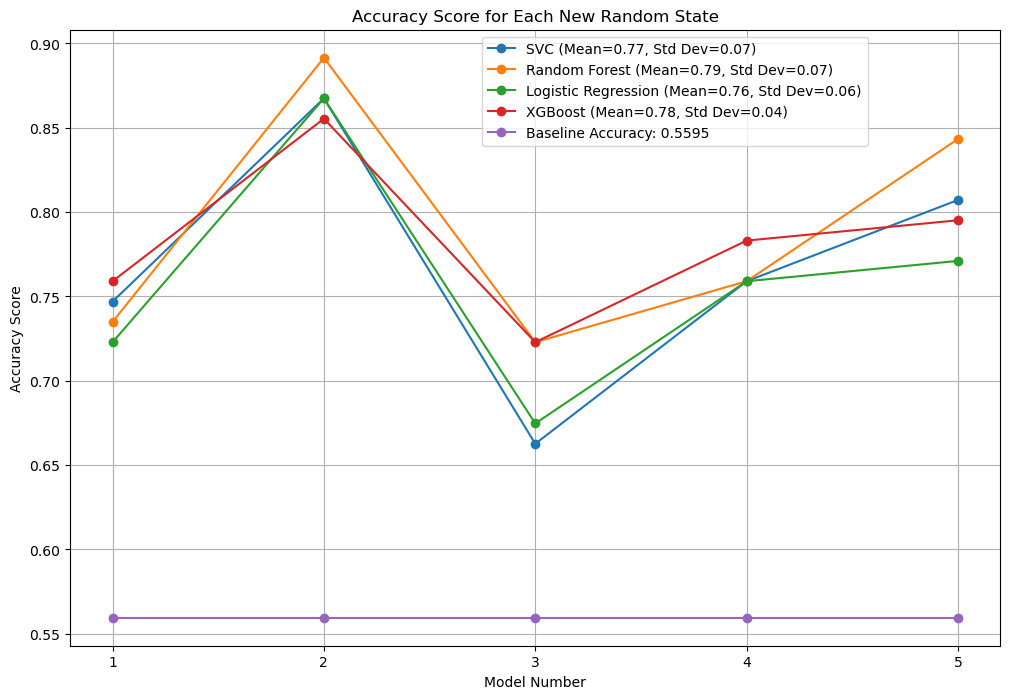

In [219]:
# Plotting
#svc_test_scores, rf_test_scores, lr_test_scores, xgb_test_scores

# Print mean and standard deviation for each list
x_values = [1, 2, 3, 4, 5]
# Calculate mean and standard deviation for each list
mean_std_labels = []
for i, lst in enumerate([svc_test_scores, rf_test_scores, lr_test_scores, xgb_test_scores], 1):
    mean_val = np.mean(lst)
    std_val = np.std(lst)
    if i == 1:
        mean_std_labels.append(f'SVC (Mean={mean_val:.2f}, Std Dev={std_val:.2f})')
    if i == 2:
        mean_std_labels.append(f'Random Forest (Mean={mean_val:.2f}, Std Dev={std_val:.2f})')
    if i == 3:
        mean_std_labels.append(f'Logistic Regression (Mean={mean_val:.2f}, Std Dev={std_val:.2f})')
    if i == 4:
        mean_std_labels.append(f'XGBoost (Mean={mean_val:.2f}, Std Dev={std_val:.2f})')


# Plotting
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed

plt.plot(x_values, svc_test_scores, label=mean_std_labels[0], marker='o')
plt.plot(x_values, rf_test_scores, label=mean_std_labels[1], marker='o')
plt.plot(x_values, lr_test_scores, label=mean_std_labels[2], marker='o')
plt.plot(x_values, xgb_test_scores, label=mean_std_labels[3], marker='o')
plt.plot(x_values, accuracy_baseline_scores, label='Baseline Accuracy: 0.5595', marker='o')

plt.xlabel('Model Number')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score for Each New Random State')
plt.legend(loc='upper center', bbox_to_anchor=(0.65, 1))  # Show legend with custom labels at a specified location
plt.xticks(x_values) 

plt.grid(True)
plt.show()

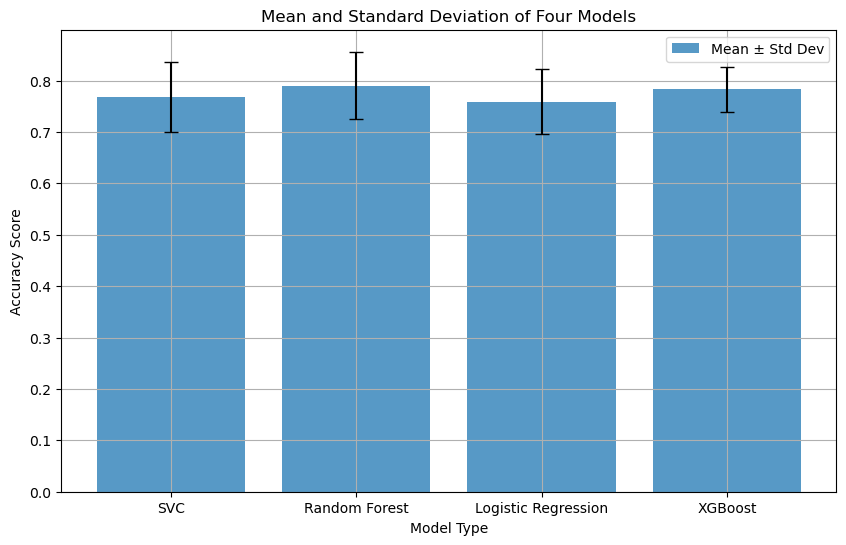

In [212]:
#Plot Averages and Standard Deviations
#svc_test_scores, rf_test_scores, lr_test_scores, xgb_test_scores

# Example data
categories = ['SVC', 'Random Forest', 'Logistic Regression', 'XGBoost']

# Calculate mean and standard deviation for each list
means = [np.mean(lst) for lst in [svc_test_scores, rf_test_scores, lr_test_scores, xgb_test_scores]]
std_devs = [np.std(lst) for lst in [svc_test_scores, rf_test_scores, lr_test_scores, xgb_test_scores]]

# Plotting
plt.figure(figsize=(10, 6))

# Plot means with error bars representing standard deviations
plt.bar(categories, means, yerr=std_devs, capsize=5, align='center', alpha=0.75, label='Mean ± Std Dev')

plt.xlabel('Model Type')
plt.ylabel('Accuracy Score')
plt.title('Mean and Standard Deviation of Four Models')

plt.legend()
plt.grid(True)
plt.show()

In [225]:
#SVC Final Model:
df = pd.read_csv('cirrhosis.csv')
df.tail()

df = df.drop(['ID'], axis=1) #ID is superfluous
df = df.drop(['Drug'], axis=1)
# df = df.replace('NA', np.nan)
column_to_check = 'Stage'
df.dropna(subset=[column_to_check], inplace=True)


# Define the mapping of values to be replaced
replacement_map = {'C': 0, 'CL': 1, 'D': 2}

# Use the replace method to replace values in the specified column
df['Status'] = df['Status'].replace(replacement_map)

y = df['Status']

X = df.loc[:, df.columns != 'Status'] 

#Now need to process the categorical, ordinal, and numerical variables
ordinal_ftrs = ['Stage'] 
ordinal_cats = [[ 1.,  2.,  3., 4.]]
onehot_ftrs = ['Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
std_ftrs = ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']

random_state = 42

X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,random_state=random_state)

# splitter for other
kf = StratifiedKFold(n_splits=4,shuffle=True,random_state=random_state)

categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant',fill_value='missing')),
        ('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'))])

# ordinal encoder
#Make the missing values categories
ordinal_transformer = Pipeline(steps=[
    ('imputer2', SimpleImputer(missing_values=np.nan, strategy='constant')),
    ('ordinal', OrdinalEncoder(categories= ordinal_cats, handle_unknown='use_encoded_value', unknown_value=np.nan))

    # ('ordinal', OrdinalEncoder(categories = ordinal_cats, handle_unknown='error'))
    ])

# standard scaler
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()), 
    ('imperative', IterativeImputer(estimator = RandomForestRegressor(n_estimators=1, random_state=84), max_iter=20, random_state=84
    ))])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, std_ftrs),
        ('cat', categorical_transformer, onehot_ftrs),
        ('ord', ordinal_transformer, ordinal_ftrs)])
# let's put together a pipeline
# the pipeline will fit_transform the training set (3 folds), and transform the last fold used as validation
# then it will train the ML algorithm on the training set and evaluate it on the validation set
# it repeats this step automatically such that each fold will be an evaluation set once

clf = RandomForestClassifier(random_state=random_state)

pipe = make_pipeline(preprocessor,clf)

param_grid = {
            'randomforestclassifier__max_depth': [5, 10, 15, 20, 30, 100], # the max_depth should be smaller or equal than the number of features roughly
            'randomforestclassifier__max_features': [0.4, 0.5, 0.6, 0.75] # linearly spaced between 0.5 and 1
            } 

# use GridSearchCV
# GridSearchCV loops through all parameter combinations and collects the results 
model = GridSearchCV(pipe, param_grid=param_grid,scoring = 'accuracy',
                    cv=kf, return_train_score = True, n_jobs=-1, verbose=True)

# this line actually fits the model on other
model.fit(X_other, y_other) # The key line where everything is happening that we wrote out code for above
# save results into a data frame. feel free to print it and inspect it

#work from best model

#Retrain RF or pickle it. Now can retrain it.

Fitting 4 folds for each of 24 candidates, totalling 96 fits


/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping crite

0.7477225977079047
0.8674698795180723
{'randomforestclassifier__max_depth': 10, 'randomforestclassifier__max_features': 0.6}


In [232]:
print(model.best_score_)
print(model.score(X_test,y_test))
print(model.best_params_)

# save the output so I can use it later
import pickle
file = open('Model.save', 'wb')
pickle.dump((model,X_test,y_test),file)
file.close()

0.7477225977079047


0.8674698795180723
{'randomforestclassifier__max_depth': 10, 'randomforestclassifier__max_features': 0.6}


In [313]:
import pickle
file = open('Model.save', 'rb')
model, X_test, y_test = pickle.load(file)
file.close()

np.random.seed(42)

nr_runs = 10
scores = np.zeros([len(X.columns),nr_runs])

test_score = model.score(X_test,y_test)
print('test score = ',test_score)
print('test baseline = ',np.sum(y_test == ' <=50K')/len(y_test))
# loop through the features
for i in range(len(X.columns)):
    print('shuffling '+str(X.columns[i]))
    acc_scores = []
    for j in range(nr_runs):
        X_test_shuffled = X_test.copy()
        X_test_shuffled[X.columns[i]] = np.random.permutation(X_test[X.columns[i]].values)
        acc_scores.append(model.score(X_test_shuffled,y_test))
    print('   shuffled test score:',np.around(np.mean(acc_scores),3),'+/-',np.around(np.std(acc_scores),3))
    scores[i] = acc_scores

test score =  0.8674698795180723
test baseline =  0.0
shuffling N_Days
   shuffled test score: 0.659 +/- 0.036
shuffling Age
   shuffled test score: 0.834 +/- 0.012
shuffling Sex
   shuffled test score: 0.867 +/- 0.0
shuffling Ascites
   shuffled test score: 0.867 +/- 0.0
shuffling Hepatomegaly
   shuffled test score: 0.858 +/- 0.009
shuffling Spiders
   shuffled test score: 0.851 +/- 0.008
shuffling Edema
   shuffled test score: 0.864 +/- 0.006
shuffling Bilirubin
   shuffled test score: 0.763 +/- 0.028
shuffling Cholesterol
   shuffled test score: 0.839 +/- 0.017
shuffling Albumin
   shuffled test score: 0.866 +/- 0.008
shuffling Copper
   shuffled test score: 0.829 +/- 0.014
shuffling Alk_Phos
   shuffled test score: 0.808 +/- 0.027
shuffling SGOT
   shuffled test score: 0.86 +/- 0.013
shuffling Tryglicerides
   shuffled test score: 0.86 +/- 0.014
shuffling Platelets
   shuffled test score: 0.833 +/- 0.014
shuffling Prothrombin
   shuffled test score: 0.828 +/- 0.022
shuffling Stage

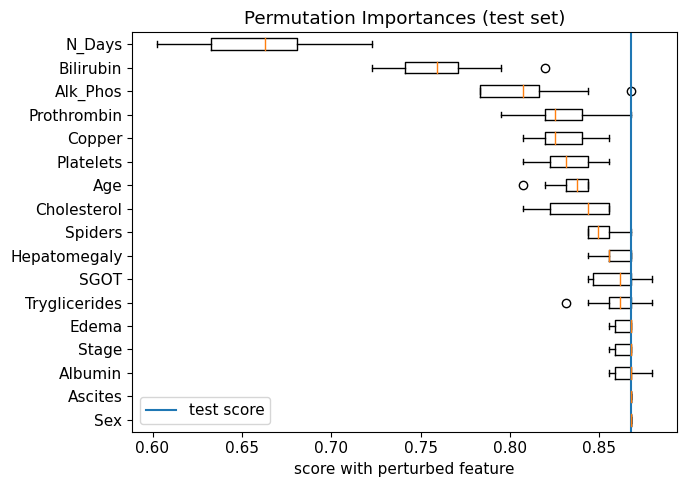

In [236]:
sorted_indcs = np.argsort(np.mean(scores,axis=1))[::-1]
plt.rcParams.update({'font.size': 11})
plt.figure(figsize=(7,5))
plt.boxplot(scores[sorted_indcs].T,labels=X.columns[sorted_indcs],vert=False)
plt.axvline(test_score,label='test score')
plt.title("Permutation Importances (test set)")
plt.xlabel('score with perturbed feature')
plt.legend()
plt.tight_layout()
plt.show()

#issue is that they are all correlated

In [237]:
#Top model with scaled coefficients
random_state = 42

X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,random_state=random_state)

# splitter for other
kf = StratifiedKFold(n_splits=4,shuffle=True,random_state=random_state)

categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant',fill_value='missing')),
        ('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'))])

# ordinal encoder
#Make the missing values categories
ordinal_transformer = Pipeline(steps=[
    ('imputer2', SimpleImputer(missing_values=np.nan, strategy='constant')),
    ('ordinal', OrdinalEncoder(categories= ordinal_cats, handle_unknown='use_encoded_value', unknown_value=np.nan))

    # ('ordinal', OrdinalEncoder(categories = ordinal_cats, handle_unknown='error'))
    ])

# standard scaler
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()), 
    ('imperative', IterativeImputer(estimator = RandomForestRegressor(n_estimators=1, random_state=84), max_iter=20, random_state=84
    ))])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, std_ftrs),
        ('cat', categorical_transformer, onehot_ftrs),
        ('ord', ordinal_transformer, ordinal_ftrs)])
# let's put together a pipeline
# the pipeline will fit_transform the training set (3 folds), and transform the last fold used as validation
# then it will train the ML algorithm on the training set and evaluate it on the validation set
# it repeats this step automatically such that each fold will be an evaluation set once

final_scaler = StandardScaler()

clf = RandomForestClassifier(random_state=random_state)

pipe = make_pipeline(preprocessor,final_scaler,clf)

param_grid = {
            'randomforestclassifier__max_depth': [5, 10, 15, 20, 30, 100], # the max_depth should be smaller or equal than the number of features roughly
            'randomforestclassifier__max_features': [0.4, 0.5, 0.6, 0.75] # linearly spaced between 0.5 and 1
            } 

# use GridSearchCV
# GridSearchCV loops through all parameter combinations and collects the results 
model = GridSearchCV(pipe, param_grid=param_grid,scoring = 'accuracy',
                    cv=kf, return_train_score = True, n_jobs=-1, verbose=True)

# this line actually fits the model on other
model.fit(X_other, y_other) # The key line where everything is happening that we wrote out code for above
# save results into a data frame. feel free to print it and inspect it

feature_names = std_ftrs + \
                list(model.best_estimator_[0].named_transformers_['cat'][0].get_feature_names_out(onehot_ftrs))

Fitting 4 folds for each of 24 candidates, totalling 96 fits


/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping crite

test score: 0.8674698795180723


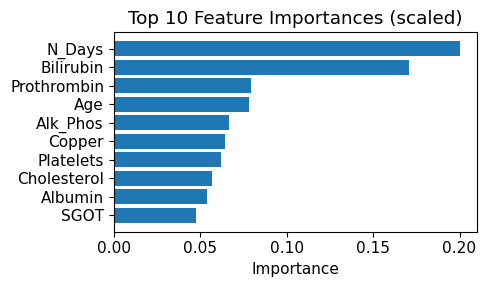

In [250]:
feature_names = np.array(feature_names)
print('test score:',model.score(X_test,y_test))
# print(model.best_estimator_[-1].feature_importances_)
feature_importances = model.best_estimator_[-1].feature_importances_
sorted_indcs = np.argsort(np.abs(feature_importances))

plt.figure(figsize=(5, 3))
plt.rcParams.update({'font.size': 11})
plt.barh(np.arange(10), feature_importances[sorted_indcs[-10:]])
plt.yticks(np.arange(10), feature_names[sorted_indcs[-10:]])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances (scaled)')
plt.tight_layout()
plt.show()

In [254]:
#Local Feature Importance
import shap
shap.initjs() # required for visualizations later on
# create the explainer object with the random forest model
explainer = shap.TreeExplainer(model.best_estimator_[1])
# transform the test set
X_test_transformed = model.best_estimator_[0].transform(X_test)
print(np.shape(X_test_transformed))
# calculate shap values on the first 50 points in the test
shap_values = explainer.shap_values(X_test_transformed[:50])
print(np.shape(shap_values))

(83, 26)
(3, 50, 26)


In [288]:
#Class 0 is C, 1 and 2 are more severe outcomes
index = 21 # the index of the point to explain  #good ones are 10, 19, and 21
print(explainer.expected_value[0]) # we explain class 0 predictions
shap.force_plot(explainer.expected_value[0], shap_values[0][index,:], features = X_test_transformed[index,:],feature_names = feature_names)

#This gets you the probability that the point falls into class 1! Pushed toward predicted probability (here 0.03). Huge for job
#Confident that they earn over 50k
#.76 is base prediction probability

0.5296656534954408


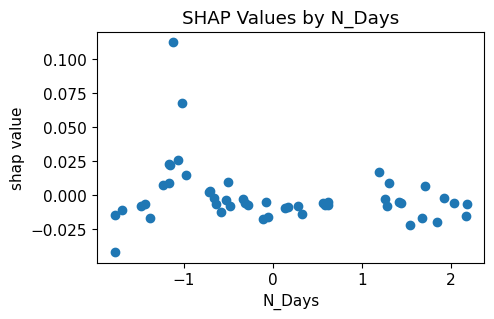

['N_Days' 'Age' 'Sex' 'Ascites' 'Hepatomegaly' 'Spiders' 'Edema'
 'Bilirubin' 'Cholesterol' 'Albumin' 'Copper' 'Alk_Phos' 'SGOT'
 'Tryglicerides' 'Platelets' 'Prothrombin' 'Stage']


In [298]:
matplotlib.rcParams.update({'font.size': 11})
ftr = 'N_Days'
indx = np.argwhere(feature_names==ftr)
plt.figure(figsize=(5,3))
plt.scatter(X_test_transformed[:50,indx],shap_values[1][:,indx])
plt.ylabel('shap value')
plt.xlabel(ftr)
plt.title('SHAP Values by N_Days')
plt.show()

print(model.feature_names_in_)

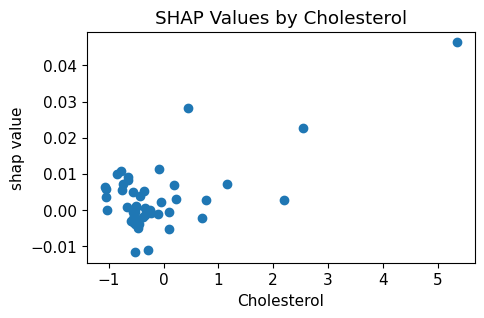

['N_Days' 'Age' 'Sex' 'Ascites' 'Hepatomegaly' 'Spiders' 'Edema'
 'Bilirubin' 'Cholesterol' 'Albumin' 'Copper' 'Alk_Phos' 'SGOT'
 'Tryglicerides' 'Platelets' 'Prothrombin' 'Stage']


In [299]:
matplotlib.rcParams.update({'font.size': 11})
ftr = 'Cholesterol'
indx = np.argwhere(feature_names==ftr)
plt.figure(figsize=(5,3))
plt.scatter(X_test_transformed[:50,indx],shap_values[1][:,indx])
plt.ylabel('shap value')
plt.xlabel(ftr)
plt.title('SHAP Values by Cholesterol')
plt.show()

print(model.feature_names_in_)

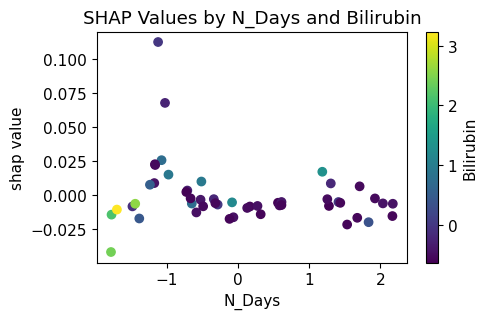

In [295]:
ftr1 = 'N_Days'
ftr2 = 'Bilirubin'
indx1 = np.argwhere(feature_names==ftr1)
indx2 = np.argwhere(feature_names==ftr2)

plt.figure(figsize=(5,3))
plt.scatter(X_test_transformed[:50,indx1],shap_values[1][:,indx1],c=X_test_transformed[:50,indx2])
plt.ylabel('shap value')
plt.xlabel(ftr1)
plt.colorbar(label=ftr2)
plt.title('SHAP Values by N_Days and Bilirubin')
plt.show()

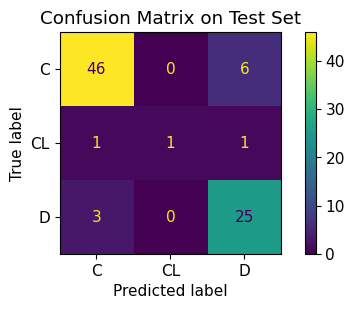

In [324]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
#Confusion Matrix
# Predict on the test set

y_pred = model.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(cm,display_labels=['C', 'CL', 'D'])
fig, ax = plt.subplots(figsize=(5,3))
disp.plot(ax=ax)
plt.tight_layout()
plt.title('Confusion Matrix on Test Set')
plt.show()

#Calculate all the metrics

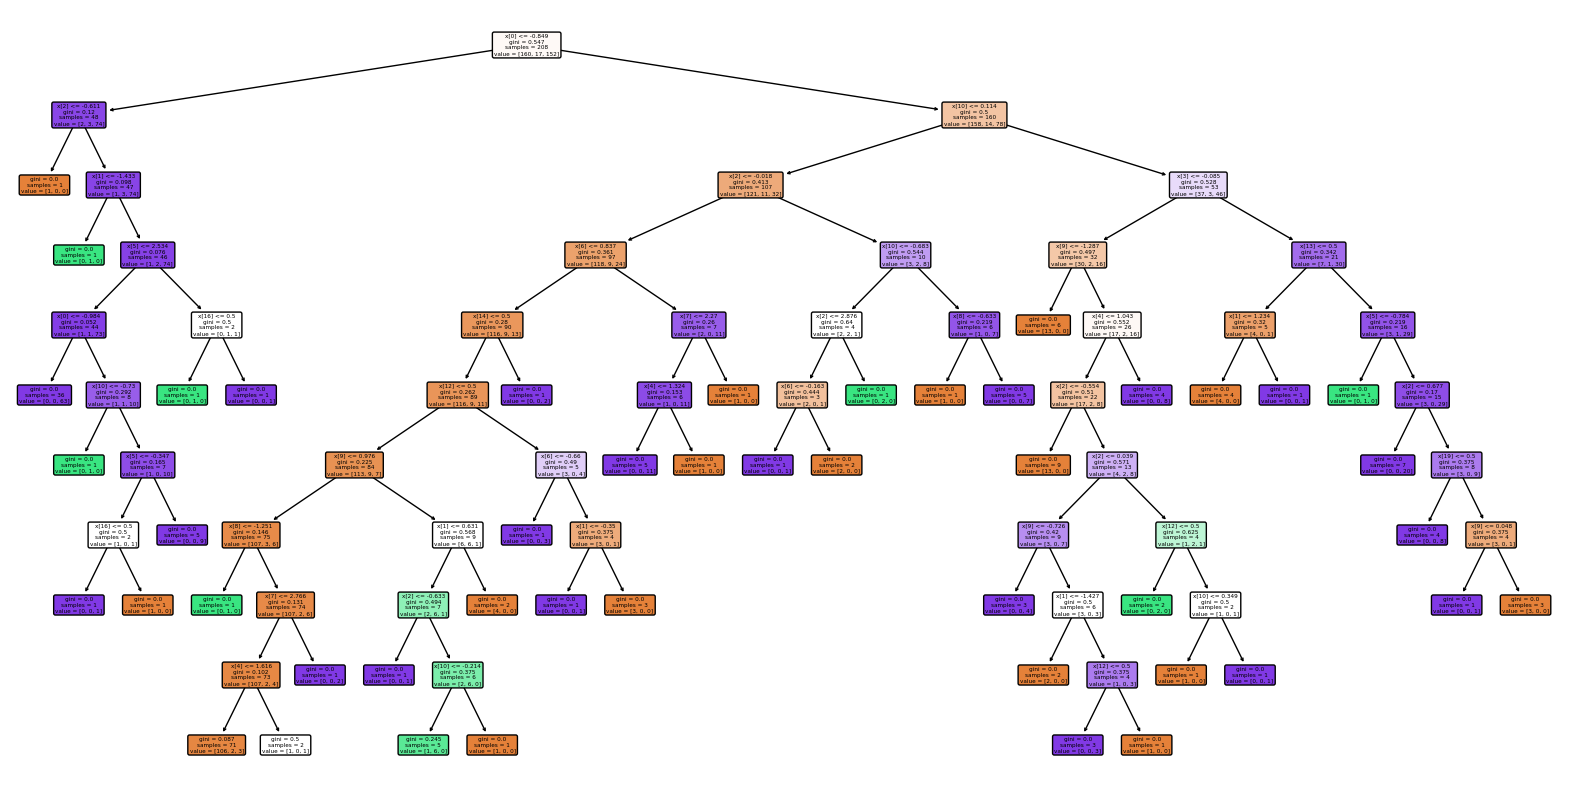

In [349]:
#Scatter plot of true vs. predicted values

# print(y_pred)
# print(y_test.to_list())

# from sklearn.tree import plot_tree
# import matplotlib.pyplot as plt

# # Assuming clf is your RandomForestClassifier
# # Assuming clf is your RandomForestClassifier
# plt.figure(figsize=(20, 10))
# # Choose the index of the tree you want to visualize (e.g., 0 for the first tree)
# tree_index = 0
# plot_tree(clf.estimators_[tree_index], feature_names=model.feature_names_in_, filled=True, rounded=True)
# plt.show()

# model.best_estimator_[-1].estimators_[0]

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming clf is your RandomForestClassifier
plt.figure(figsize=(20, 10))
plot_tree(model.best_estimator_[-1].estimators_[0], filled=True, rounded=True)
plt.show()

# print(list(model.feature_names_in_))


In [354]:
# Plot decision boundaries
plt.figure(figsize=(10, 6))

# Generate a grid of points
xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 100))

# Use the classifier to predict the classes for each point in the grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Contour plot of decision boundaries
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.3)

# Scatter plot of data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Random Forest Decision Boundaries (Multiclass)')
plt.show()


InvalidIndexError: (slice(None, None, None), 0)

<Figure size 1000x600 with 0 Axes>

### Questions
- Generally check that the results look okay
    - Have to make sure results are reproduceable?

- Getting f1 score to work:
    - Wanna use weighted cuz classification is imbalanced
    - works for accuracy score!
    - how do I get this to work with f1 given multiclass


- ASK: Inspect your model (e.g., confusion matrix, scatter plot of the true vs predicted values in regression, global/local feature importances).
    - A single model for each? The best model? Generally just check i'm training right amount of models
        - Look at how to determine which final model to select. Just select model that corresponds to highest score?
    - Should it be 5 baseline scores for the 5 random states?
    - ARE AVERAGE AND STDT SCORES OR WITHIN EACH RANDOM STATE FOR EACH FOLD?

- help with the convergence warnings

- Zipping my models

### TO DO
- Inspect your model (e.g., confusion matrix, scatter plot of the true vs predicted values in regression, global/local feature importances)
    - Gonna need to study coefficients of LogReg by scaling again
- Describe what steps you took to make your model interpretable. What did you learn?
- Model Table (CV)
- Reevaluate the param_grids and probably retrain
- CHECK EVERYTHING AND ASK QUESTIONS

### Choices
- StraifiedKFold
- Multivar Imputation (Reduced Features Model)
- Accuracy Score (f1 score)
- Global feature importance metrics vs. permutation feature importance (too much correlation)
    - Could even use SHAP